In [0]:
# Import Helper.py mounting the GDrive
#from google.colab import drive
#drive.mount('/content/drive/')

import os
os.chdir('/content/drive/My Drive/UFSM/DCG/Deep Learning/Dataset Esportes/input')

In [0]:
import tensorflow.compat.v2 as tf
from collections import deque
import numpy as np
import pickle
import cv2
from google.colab.patches import cv2_imshow

In [0]:
# Carrega o modelo treinado
model = tf.keras.models.load_model('output/sports_train_model.h5')
lb = pickle.loads(open('output/lb.pickle', "rb").read())
# Traduz as labels
lb_pt = ['Futebol', 'Tenis', 'Levantamento de Peso']

In [0]:
# initialize the image mean for mean subtraction along with the
# predictions queue
mean = np.array([123.68, 116.779, 103.939][::1], dtype="float32")
# Define uam fila de 128 frames para correção final
Q = deque(maxlen=128)

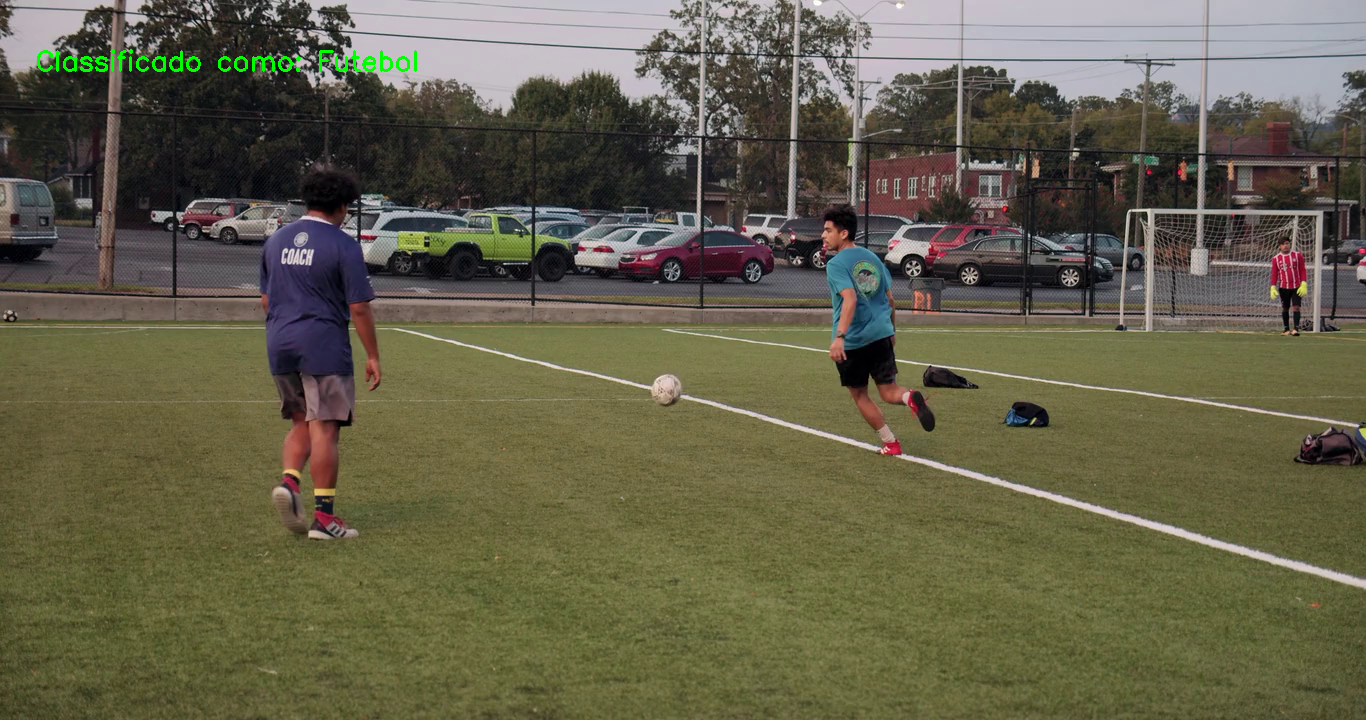

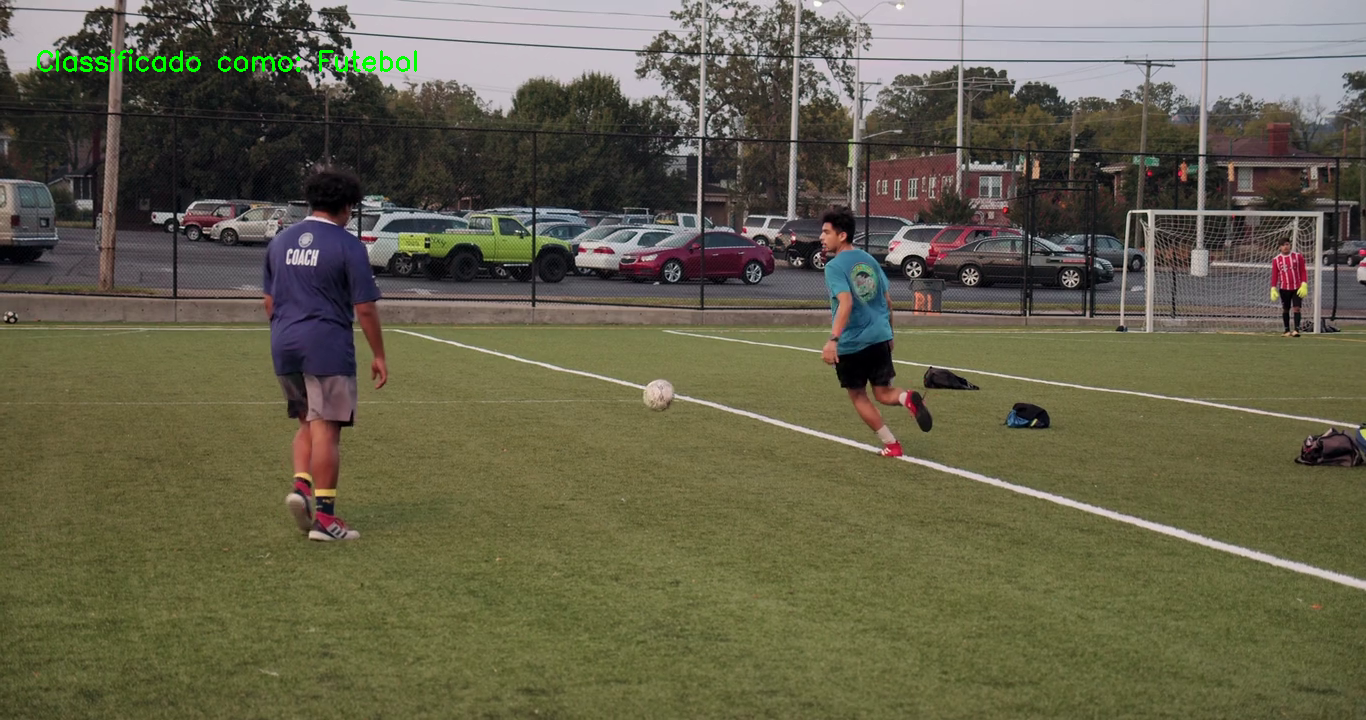

In [0]:
# Captura o vídeo pelo path dele
vs = cv2.VideoCapture('example_clips/lifting2.mp4')
writer = None
(W, H) = (None, None)

# loop over frames from the video file stream
while True:
  # read the next frame from the file
  (grabbed, frame) = vs.read()
  # if the frame was not grabbed, then we have reached the end
  # of the stream
  if not grabbed:
    break
  # if the frame dimensions are empty, grab them
  if W is None or H is None:
    (H, W) = frame.shape[:2]

  # Clona o frame
  output = frame.copy()
  # Converte para RGB
  frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
  # Redimensiona para 224x224
  frame = cv2.resize(frame, (224, 224)).astype("float32")
  # Subtrai da média
  frame -= mean

  # Prediz a label para o frame em questão
  preds = model.predict(np.expand_dims(frame, axis=0))[0]
  # Adiciona na fila
  Q.append(preds)
  # Calcula a média da fila nas colunas e retorna o indice do maior valor
  results = np.array(Q).mean(axis=0)
  i = np.argmax(results)
  # Pelo one hot é possível saber qual label é
  label = lb_pt[i]

  # Texto para escrita no vídeo
  cv2.putText(output, "Classificado como: {}".format(label), (35, 70), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2)

  # Vê se não inicializou com alguma outra variável (deve iniciar sem nada)
  if writer is None:
	  # Inicializa a 'escrita' do video
    fourcc = cv2.VideoWriter_fourcc(*"MJPG")
    writer = cv2.VideoWriter('output/lifting2_frame_pred3.avi', fourcc, 30,(W, H), True)

  # Salva o video novo no diretório selecionado
  writer.write(output)
	# Mostra o vídeo
  cv2_imshow(output)
  key = cv2.waitKey(1) & 0xFF
	# Se a tecla Q for pressionada, sai do vídeo
  if key == ord("q"):
  	break
# Libera os escritores
writer.release()
vs.release()



  